In [ ]:
Урок 16-1
Основы статистики. Условная
вероятность и теорема Байеса

In [ ]:
1. Функция распределения (CDF): Дает вероятность того, что случайная
переменная меньше или равна определенному значению.

2. Функция процентной точки (PPF): Функция, обратная CDF, используется для
нахождения значения, ниже которого опускается заданный процент
наблюдений.

3. Функция выживания (SF): Дает вероятность того, что случайная переменная
больше определенного значения, дополняя CDF.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


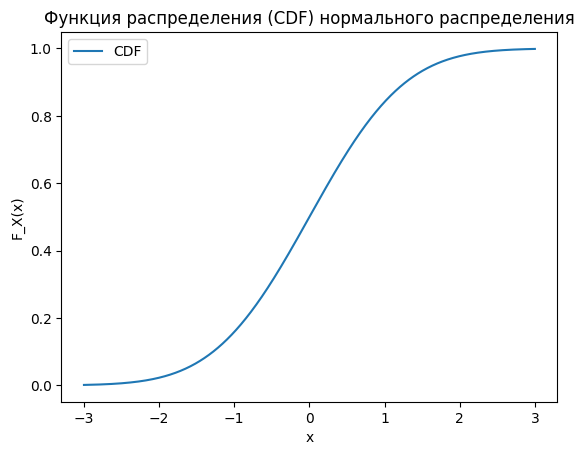

In [3]:
# Параметры
mu = 0 # среднее значение
sigma = 1 # стандартное отклонение
# Генерируем значения
x = np.linspace(-3, 3, 1000)
cdf_values = norm.cdf(x, mu, sigma)
# Строим график CDF
plt.plot(x, cdf_values, label='CDF')
plt.title('Функция распределения (CDF) нормального распределения')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.legend()
plt.show()

In [ ]:
Функция процентной точки (PPF), также известная как обратная CDF, - это
функция, дающая значение, ниже которого окажется заданный процент
наблюдений в распределении.

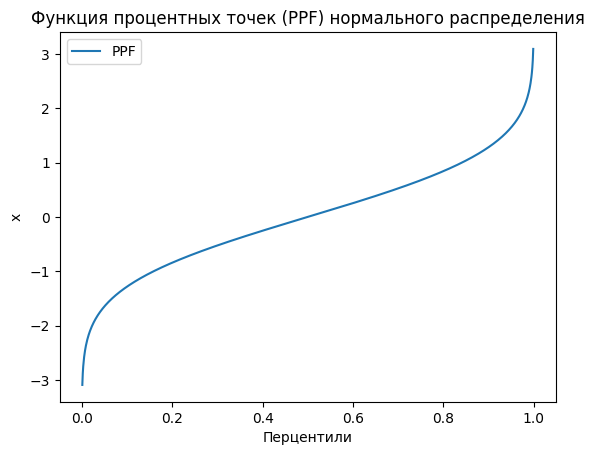

In [7]:
# Генерируем значения
percentiles = np.linspace(0, 1, 1000)
ppf_values = norm.ppf(percentiles, mu, sigma)
# Строим график PPF
plt.plot(percentiles, ppf_values, label='PPF')
plt.title('Функция процентных точек (PPF) нормального распределения')
plt.xlabel('Перцентили')
plt.ylabel('x')
plt.legend()
plt.show()


In [ ]:
Функция выживания, также известная как функция надежности, дает
вероятность того, что случайная переменная 𝑋 больше определенного значения 𝑥.

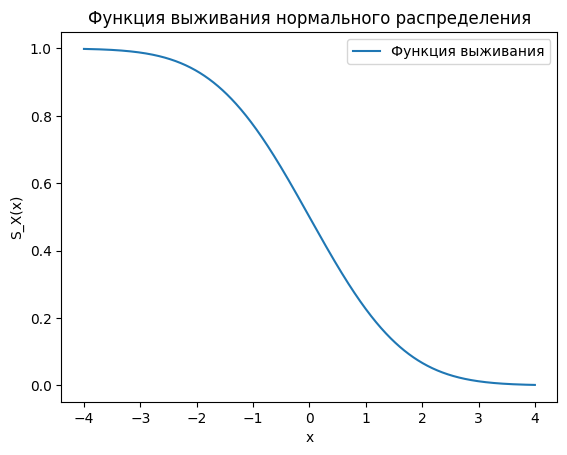

In [8]:
# Генерируем значения
survival_values = 1 - cdf_values
# Строим график функции выживания
plt.plot(x, survival_values, label='Функция выживания')
plt.title('Функция выживания нормального распределения')
plt.xlabel('x')
plt.ylabel('S_X(x)')
plt.legend()
plt.show()


In [5]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm

mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_pdf = norm.pdf(x, mu, sigma)
y_cdf = norm.cdf(x, mu, sigma)
fig = make_subplots(rows=1, cols=2, subplot_titles=("Probability Density Function (PDF)", "Cumulative Distribution Function (CDF)"))
pdf_trace = go.Scatter(x=x, y=y_pdf, mode='lines', name='PDF')
cdf_trace = go.Scatter(x=x, y=y_cdf, mode='lines', name='CDF')
fig.add_trace(pdf_trace, row=1, col=1)
fig.add_trace(cdf_trace, row=1, col=2)
# pdf_fill = go.Scatter(x=[], y=[])
# cdf_fill = go.Scatter(x=[], y=[])
fig.add_trace(pdf_fill, row=1, col=1)
fig.add_trace(cdf_fill, row=1, col=2)
frames = []
for i in range(1, len(x) + 1):
    frame = go.Frame(data=[
    go.Scatter(x=x[:i], y=y_pdf[:i], fill='tozeroy', mode='none',
    fillcolor='rgba(0, 0, 255, 0.5)'),
    go.Scatter(x=x[:i], y=y_cdf[:i])
])
frames.append(frame)
fig.update_layout(
updatemenus=[{
'type': 'buttons',
'showactive': False,
'buttons': [{
'label': 'Play',
'method': 'animate',
'args': [None, {
'frame': {'duration': 20, 'redraw': True},
'fromcurrent': True
}]
}, {
'label': 'Pause',
'method': 'animate',
'args': [[None], {
'frame': {'duration': 0, 'redraw': False},
'mode': 'immediate',
'transition': {'duration': 0}
}]
}]
}]
)
fig.update_xaxes(title_text="x", range=[mu - 4*sigma, mu + 4*sigma], row=1,
col=1)
fig.update_yaxes(title_text="Density", range=[0, max(y_pdf)*1.1], row=1, col=1)
fig.update_xaxes(title_text="x", range=[mu - 4*sigma, mu + 4*sigma], row=1,
col=2)
fig.update_yaxes(title_text="Cumulative Probability", range=[0, 1.1], row=1,
col=2)
fig.frames = frames
fig.show()


# fig, axes = plt.subplots(1,2, figsize=(12,5))

# # Строим график CDF
# axes[0].plot(x, cdf_values, label='CDF')

NameError: name 'pdf_fill' is not defined

In [ ]:
Визуализация сравнения PDF и CDF

In [ ]:
CDF в точке 𝑥 - это площадь под кривой PDF от отрицательной бесконечности
до 𝑥.

C:\Users\user\AppData\Local\Temp\ipykernel_14488\2321623800.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

C:\Users\user\AppData\Local\Temp\ipykernel_14488\2321623800.py:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



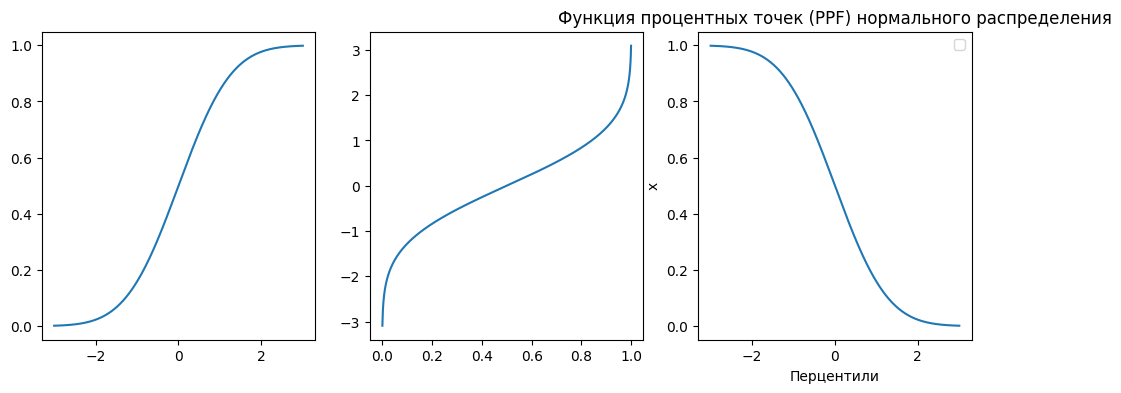

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform

# Параметры
mu = 0 # среднее значение
sigma = 1 # стандартное отклонение

# Генерируем значения
x = np.linspace(-3, 3, 1000)
cdf_values = norm.cdf(x, mu, sigma)

fig, axes = plt.subplots(1,3, figsize=(12,4))

# Строим график CDF
axes[0].plot(x, cdf_values, label='CDF')
plt.title('Функция распределения (CDF) нормального распределения')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.legend()


# Генерируем значения
percentiles = np.linspace(0, 1, 1000)
ppf_values = norm.ppf(percentiles, mu, sigma)

# Строим график PPF
axes[1].plot(percentiles, ppf_values, label='PPF')
plt.title('Функция процентных точек (PPF) нормального распределения')
plt.xlabel('Перцентили')
plt.ylabel('x')
plt.legend()

# Генерируем значения
survival_values = 1 - cdf_values

# Строим график функции выживания
axes[2].plot(x, survival_values, label='Функция выживания')

In [ ]:
Условная вероятность

In [ ]:
Условная вероятность - это фундаментальная концепция теории
вероятностей, которая связана с определением вероятности события с учетом
того, что другое событие уже произошло.


$P(A|B) = \frac{P(A\cap B)}{P(B)}$

In [ ]:
A -- идет дождь
B --  светит солнце
A|B -- идет дождь при условии, что светит солнце
A\cap B-- идет и дождь и светит солнце

In [ ]:
10 участников
В -- получить золотую медаль
А -- получить медаль

Какая вероятность получить золотую медаль, если известно, что вы получили медаль?
1/3

Какая вероятность получить золотую медаль?
1/10

Какая вероятность получить медаль?
3/10

$P(A\cap B)$

In [ ]:
Какова вероятность получить просто медаль и одновременно получить золотую медаль?

1/10

$P(A|B) = \frac{P(A\cap B)}{P(B)}$ = $\frac{1/10}{3/10}$=\frac{1/3}$

In [ ]:
A -- выжил
В -- плыл первым классом
Вопрос: какая вероятность, что выжил, если плыл первым классом

Ответ:
Вероятность, что выжил и плыл первым классом
поделить на
Вероятность, что плыл первым классом


891 пассажиров, 216 - 1 кл, 136 -- выжило 1 кл

Ответ: (136/891) / (216/891) = 136/216

In [12]:
import seaborn as sns

data = sns.load_dataset('titanic')
passengers_per_class = data['class'].value_counts()

survived_per_class = data[data['survived'] == 1]['class'].value_counts()
for pclass in ['First', 'Second', 'Third']:
    total_passengers = passengers_per_class.get(pclass, 0)
    survived_passengers = survived_per_class.get(pclass, 0)
    print(f"Класс {pclass}: Всего пассажиров = {total_passengers}, Выжили = {survived_passengers}")

Класс First: Всего пассажиров = 216, Выжили = 136
Класс Second: Всего пассажиров = 184, Выжили = 87
Класс Third: Всего пассажиров = 491, Выжили = 119


In [13]:
216+184+491

891

In [ ]:
Общая вероятность: кол-во успехов делим на общее кол-во
Условная вероятность: кол-во успехов при событии делим на кол-во события

In [14]:
# Total passengers and survivors
total_passengers = 1316
total_survivors = 498
# Passengers by class
first_class_passengers = 325
second_class_passengers = 285
third_class_passengers = 706
# Survivors by class
first_class_survivors = 202
second_class_survivors = 118
third_class_survivors = 178
# Probability of survival for first class passengers
# P(A|B) = P(A ∩ B) / P(B)
# A: survival
# B: first class passenger
# P(A ∩ B): Probability of being a first-class passenger and surviving
probability_first_class_and_survived = first_class_survivors / total_passengers
# P(B): Probability of being a first-class passenger
probability_first_class = first_class_passengers / total_passengers
# Conditional probability of survival given first class
conditional_probability = probability_first_class_and_survived / probability_first_class
print(f"The probability of survival for a first-class passenger is: {conditional_probability:.4f}")

The probability of survival for a first-class passenger is: 0.6215


In [ ]:
Закон полной вероятности

In [ ]:
А -- любит есть мясо
==========================
В1 -- любит кошек, не любит собак 100 чел -- 30
В2 -- любит собак, не любит кошек 150 -- 20
В3 -- любит кошек и собак 50 -- 10
В4 -- не любит кошек и собак 100 -- 80
Итого 400

Формула Полной вероятности
30/400 + 20/400 + 10/400 + 80/400 = 140/400

30/400 = (30/100 * 100/400)

Формула условной вероятности
(30/100 * 100/400) + (20/150 * 150/400) + ...

Задача: найти вероятность того, что человек ест мясо Р(А)

Формула Полной вероятности
Р(А) = (Вероятность А и В1) + (Вероятность А и В2) + (Вероятность А и В3) + (Вероятность А и В4) 

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

$P(A|B) * P(B)= P(A\cap B)$

In [ ]:
У нас есть два мешка с шариками:
● Мешок 1: содержит 7 красных и 3 зеленых шарика.
● Мешок 2: содержит 2 красных и 8 зеленых шариков.
Мы наугад выбираем один из мешков, а затем наугад выбираем один шарик из этого мешка. Мы хотим найти
вероятность того, что шарик окажется зеленым.
1. Определите события.
2. Вычислите вероятности.
3. Примените закон полной вероятности.

=======================================================

М1 -- выбран первый мешок
М2 -- выбран второй мешок
Z -- вытащили зеленый шарик

P(M1) = 1/2
P(M2) = 1/2
P(Z|M1) = 3/10
P(Z|M2) = 8/10
P(Z) = P(Z|M1) * P(M1) + P(Z|M2) * P(M2) = 11/20 = 0.55

In [ ]:
Теорема Байеса


In [ ]:
Теорема Байеса - это расширение условной вероятности, которое позволяет
нам обновлять вероятность события на основе новых данных.


$P(A|B)=\frac{P(B|A) * P(A)}{P(B)}$

$P(A|B) * P(B) = {P(B| A)} * P(A)$

In [ ]:
После преобразований получаем Формулу условной вероятности:

$P(A|B) * P(B) = {P(A\cap B)}$

$P(B|A) * P(A) = {P(B\cap A)}$

In [ ]:
Теорема Байеса доказана

$P(A|B)=\frac{P(B|A) * P(A)}{P(B)}$

$P(A)=0.01$

$P(B|A)=0.99$

$\overline A$ -- здоров

$P(\overline A) = 1 - P(A)= 0.99$ -- вычислили

$ P(B|\overline{A} = 0.01$ -- по условию задачи (додумали)

$P(B) = P(B|A) * P(A) + P(B|\overline{A})* P(\overline A) = 0.99 *0.01 + 0.01 * 0.99$

$\frac{0.99 * 0.01}{(2*0.99*0.01)}= 1/2$

In [1]:
(0.99 * 0.01)/(0.999*0.01+0.99*0.001)

0.9016393442622952

In [ ]:
1. Колода из 52 карт содержит 12 лицевых карт (короли, королевы и валеты) и
40 нелицевых карт. Если наугад взять одну карту, какова вероятность того,
что это лицевая карта, учитывая, что это красная карта?

26 красных
6 красных
6/26

In [ ]:
total_red_cards = 26
red_face_cards = 6
P_face_given_red = red_face_cards / total_red_cards
print(f"Вероятность: {P_face_given_red}")


In [ ]:
2. Система фильтрации электронной почты помечает письма как спам с
точностью 98 %. Однако она ошибочно помечает легитимные письма как спам
с частотой ошибок 1 %. Если 5 % полученных писем являются спамом, а
письмо помечено как спам, какова вероятность того, что это действительно
спам?

Р(А) = 0.05 -- спам
Р(В|А) = 0.98 -- вероятность быть помеченным как спам, если спам
Р(В|~А) = 0.01 -- вероятность быть помеченным как спам, если не спам

Вопрос
==============
P(A|B) = ?

P(A|B) = P(B|A) * P(A)/P(B) = 0.98 * 0.05 / (0.98 * 0.05 + 0.1 * (1 - 0.05))
P(B) = P(B|A) * P(A) + P(B|~A) * P(~A) = 0.98 * 0.05 + 0.1 * (1 - 0.05)


In [ ]:
Система фильтрации электронной почты помечает письма как спам с точностью 98 %. 
Однако она ошибочно помечает легитимные письма как спам с частотой ошибок 1 %. 
Если 5 % полученных писем являются спамом, а письмо помечено как спам, какова вероятность того, что это действительно спам?

Условие
=======
P(A) = 0.05  -- спам
P(B|A) = 0.98 -- вероятность быть помеченным как спам, если спам
P(B|~A) = 0.01 -- вероятность быть помеченным как спам, если неспам
Вопрос
====
P(A|B) = ?

P(A|B) = P(B|A) * P(A)/P(B) = 0.98 * 0.05 / (0.98 * 0.05 + 0.01 * (1 - 0.05))
P(B) = P(B|A) * P(A) + P(B|~A) * P(~A) = 0.98 * 0.05 + 0.01 * (1 - 0.05)

In [17]:
0.98 * 0.05 / (0.98 * 0.05 + 0.01 * (1 - 0.05))

0.8376068376068376

In [ ]:
P_spam = 0.05
P_marked_spam_given_spam = 0.98
P_marked_spam_given_legit = 0.01
P_marked_spam = (P_marked_spam_given_spam * P_spam) +
(P_marked_spam_given_legit * (1 - P_spam))
P_spam_given_marked_spam = (P_marked_spam_given_spam * P_spam) / P_marked_spam
print(f"Вероятность: {P_spam_given_marked_spam}")


In [ ]:
3. Футбольная команда выигрывает 60 % своих матчей. Учитывая, что команда
выиграла матч, вероятность того, что она забила более 2 голов, равна 30 %.
Какова вероятность того, что команда выиграла и забила более 2 голов в матче?

Условие
======
P(A) = 0.6 -- вероятность выигр.
P(B) -- вероятность, что забила более двух голов
P(A|B) = 0.3
Вопрос
P(B) = 0.6 * 0.3

In [ ]:
P_win = 0.6
P_more_than_2_goals_given_win = 0.3
P_more_than_2_goals = P_more_than_2_goals_given_win * P_win
print(f"Вероятность: {P_more_than_2_goals}")


In [ ]:
4. Брошены две честные шестигранные игральные кости. Какова вероятность
того, что сумма костей равна 7, если хотя бы на одной из костей выпало 3?

А -- сумма костей равна 7
В -- выпало 3 хотя бы на одной


P(A|B) = P(A \cap B) / P(B)

P(B) = 11/кол-во всех вариантов 36 
(1,3) (2, 3) ... (6,3) -- 6 штук
(3,1) (3,2) ... (3,6) -- 5 штук

P(A \cap B) = 2/кол-во всех вариантов 36 
(3,4), (4,3) 

ответ 2/11

In [ ]:
possible_outcomes = [(3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (1,3), (2,3), (4,3), (5,3), (6,3)]
favorable_outcomes = [(3,4), (4,3)]
P_sum_7_given_3 = len(favorable_outcomes) / len(possible_outcomes)
print(f"Вероятность: {P_sum_7_given_3}")